# Dil fridge initial data for debugging


In [15]:
# pip install git+https://github.com/sandersa-nist/pyMez.
# pip install pyserial
from pyMez import *
import time
import json
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

In [17]:
#create vna object
vna=VNA("GPIB0::19::INSTR")

The information sheet was not found defaulting to address


In [18]:
vna.initialize()

In [23]:
s2p=vna.measure_sparameters()
s2p.save("test.s2p")
network = rf.Network('test.s2p')
fghz = network.f/1e9


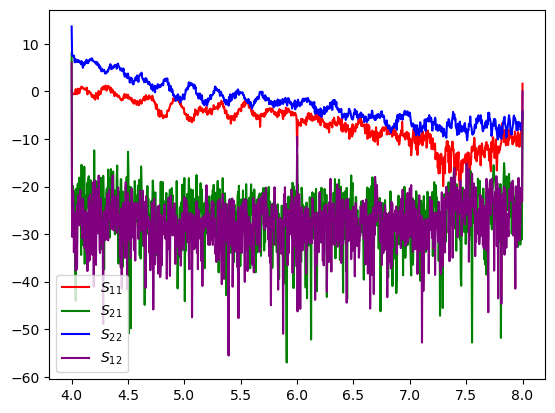

In [37]:
plt.plot(fghz,network.s_db[:,0,0],color="red")
plt.plot(fghz,network.s_db[:,1,0],color="green")
plt.plot(fghz,network.s_db[:,1,1],color="blue")
plt.plot(fghz,network.s_db[:,0,1],color="purple")
plt.legend(['$S_{11}$','$S_{21}$','$S_{22}$','$S_{12}$'])


In [ ]:
vna.close()

In [21]:
# get state of VNA and save to JSON file called vna_state.txt:

vna_state = {}
vna_state['power'] = vna.get_power()
vna_state['startf'] = min(vna.get_frequency())
vna_state['stopf'] = max(vna.get_frequency())
vna_state['npoints'] = len(vna.get_frequency())
vna_state['ifbw'] = vna.get_IFBW()
vna_state_json = json.dumps(vna_state)
vna_state_file = open("vna_state.txt", "w")
vna_state_file.write(vna_state_json)
vna_state_file.close()


In [21]:
vna_state

{'power': '+0.00000000000E+000\n',
 'startf': 1000000000.0,
 'stopf': 10000000000.0,
 'npoints': 6401,
 'ifbw': 200.0}